In [3]:
from IPython.display import clear_output
%cd /content/drive/MyDrive/collab_sandbox/learn_DL/dive_into_dl/2.0/

!pip install -U d2l

clear_output()

# 2.1.1 Getting Started

In [ ]:
import torch

In [ ]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
torch.tensor([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
x.shape

torch.Size([12])

In [ ]:
x.numel()

12

In [ ]:
x.reshape(3, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

same operation

In [ ]:
x.reshape(3, -1)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [ ]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

 Each of its elements is randomly sampled from a standard Gaussian (normal) distribution
with a mean of 0 and a standard deviation of 1.

In [ ]:
torch.randn(3, 4)

tensor([[-1.0873, -0.3280, -0.2824,  0.0063],
        [-0.9874, -1.5500,  0.6896,  0.1181],
        [ 0.0813, -0.8334,  0.6927, -2.3117]])

In [ ]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
print(x + y) 
print(x - y) 
print(x * y) # elementwise operation
print(x / y) 
print(x**y) # The ** operator is exponentiation

tensor([ 3.,  4.,  6., 10.])
tensor([-1.,  0.,  2.,  6.])
tensor([ 2.,  4.,  8., 16.])
tensor([0.5000, 1.0000, 2.0000, 4.0000])
tensor([ 1.,  4., 16., 64.])


In [ ]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
X.sum()

tensor(66.)

In [ ]:
X[0:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

# 2.1.5 Saving Memory

In [ ]:
before = id(Y)
Y = Y + X
id(Y) == before

False

In [ ]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))


id(Z): 140061534958032
id(Z): 140061534958032


Or

In [ ]:
before = id(X)
X += Y
id(X) == before

True

# 2.1.6 Conversion to Other Python Objects

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
X.numpy()

array([[26., 25., 28., 27.],
       [25., 26., 27., 28.],
       [20., 21., 22., 23.]], dtype=float32)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)


(tensor([3.5000]), 3.5, 3.5, 3)

# 2.2 Data Preprocessing

In [ ]:
import os
os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
  f.write('NumRooms,Alley,Price\n') # Column names
  f.write('NA,Pave,127500\n') # Each row represents a data example
  f.write('2,NA,106000\n')
  f.write('4,NA,178100\n')
  f.write('NA,NA,140000\n')

In [ ]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [ ]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [ ]:
outputs

0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64

In [ ]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [ ]:
import torch
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

# 2.3 Linear Algebra

### 2.3.1 Scalars

In [ ]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2 Vectors


In [ ]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

In [ ]:
len(x)

4

In [ ]:
x.shape

torch.Size([4])

### 2.3.3 Matrices

In [ ]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [ ]:
A = torch.arange(20).reshape(5, -1)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [ ]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

B is simmetric 

In [ ]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [ ]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 2.3.4 Tensors

tensors is just n-dimensional matrices.

Tensors will become more important when we start working with images, which arrive as ndimensional arrays with 3 axes corresponding to the height, width, and a channel axis for stacking
the color channels (red, green, and blue).

In [ ]:
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5 Basic Properties of Tensor Arithmetic

In [ ]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
B = A.clone() # Assign a copy of `A` to `B` by allocating new memory
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
 A + B

tensor([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]])

Hadamard product (math
notation ⊙

In [ ]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

In [ ]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
a + X

tensor([[[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13]],

        [[14, 15, 16, 17],
         [18, 19, 20, 21],
         [22, 23, 24, 25]]])

In [ ]:
type(X.shape[-1])

int

### 2.3.6 Reduction

In [ ]:
x = torch.arange(4, dtype=torch.float32)
x, x.sum()


(tensor([0., 1., 2., 3.]), tensor(6.))

In [ ]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [ ]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape


(tensor([40., 45., 50., 55.]), torch.Size([4]))

In [ ]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

In [ ]:
A.mean(), A.sum() / A.numel()

(tensor(9.5000), tensor(9.5000))

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [ ]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

In [ ]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### 2.3.7 Dot Products

In [ ]:
y = torch.ones(4, dtype=torch.float32)

In [ ]:
x

tensor([0., 1., 2., 3.])

In [ ]:
torch.dot(x, y)

tensor(6.)

In [ ]:
torch.sum(x * y)

tensor(6.)

### 2.3.8 Matrix-Vector Products

In [ ]:
x

tensor([0., 1., 2., 3.])

In [ ]:
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
torch.mv(A, x), torch.mv(A, x).shape

(tensor([ 14.,  38.,  62.,  86., 110.]), torch.Size([5]))

In [ ]:
A.shape, x.shape,

(torch.Size([5, 4]), torch.Size([4]))

### 2.3.9 Matrix-Matrix Multiplication

In [ ]:
B = torch.ones(4, 3)

In [ ]:
A, A.shape

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]), torch.Size([5, 4]))

In [ ]:
B, B.shape

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]), torch.Size([4, 3]))

In [ ]:
torch.mm(A, B), torch.mm(A, B).shape

(tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]), torch.Size([5, 3]))

### 2.3.10 Norms

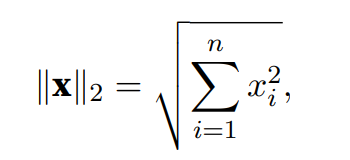

In [ ]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)


tensor(5.)

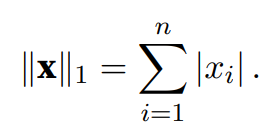

In [ ]:
torch.abs(u).sum()


tensor(7.)

Analogous to L2 norms of vectors, the Frobenius norm of a matrix X ∈ R
m×n
is the square root of
the sum of the squares of the matrix elements:


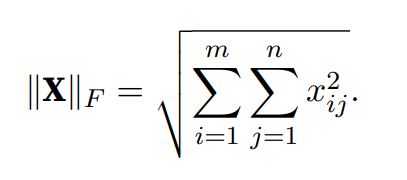

In [ ]:
torch.ones((4, 9))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
torch.norm(torch.ones((4, 9))) # 9 + 9 + 9 + 9 = 36^(1/2) = 6

tensor(6.)

### 2.4.1 Derivatives and Differentiation

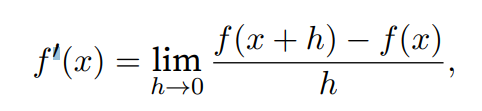

In [ ]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l

def f(x):
  return 3 * x ** 2 - 4 * x

def numerical_lim(f, x, h):
  return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
  print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
  h *= 0.1



h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [ ]:
def use_svg_display(): 
  """Use the svg format to display a plot in Jupyter."""
  display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)): 
  """Set the figure size for matplotlib."""
  use_svg_display()
  d2l.plt.rcParams['figure.figsize'] = figsize


def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
  """Set the axes for matplotlib."""
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel)
  axes.set_xscale(xscale)
  axes.set_yscale(yscale)
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  if legend:
    axes.legend(legend)
  axes.grid()


def plot(
    X, 
    Y=None, 
    xlabel=None, 
    ylabel=None, 
    legend=None, 
    xlim=None,
    ylim=None, 
    xscale='linear', 
    yscale='linear',
    fmts=('-', 'm--', 'g-.', 'r:'), 
    figsize=(3.5, 2.5), 
    axes=None
  ):
  """Plot data points."""
  
  if legend is None:
    legend = []

  set_figsize(figsize)

  axes = axes if axes else d2l.plt.gca()
  # Return True if `X` (tensor or list) has 1 axis
  def has_one_axis(X):
    return (hasattr(X, "ndim") and X.ndim == 1 or
      isinstance(X, list) and not hasattr(X[0], "__len__"))
    
  if has_one_axis(X):
    X = [X]
  
  if Y is None:
    X, Y = [[]] * len(X), X
  elif has_one_axis(Y):
    Y = [Y]
  if len(X) != len(Y):
    X = X * len(Y)
  axes.cla()
  for x, y, fmt in zip(X, Y, fmts):
    if len(x):
      axes.plot(x, y, fmt)
    else:
      axes.plot(y, fmt)
  set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

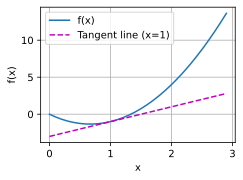

In [ ]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


### 2.5.1 A Simple Example

In [ ]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
x.requires_grad_(True) # Same as `x = torch.arange(4.0, requires_grad=True)`
x.grad

In [ ]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad == 4 * x

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 2.5.3 Detaching Computation

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

## Linear Neural Networks

### Linear regression

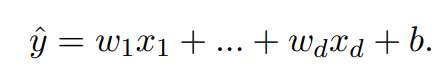

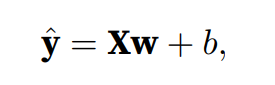

### Loss function

$$
l^i(w, b) = 1/2  (ŷ^i - y^i)^2
$$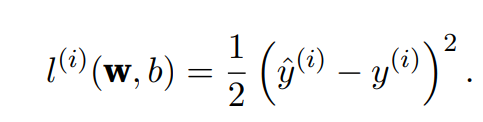

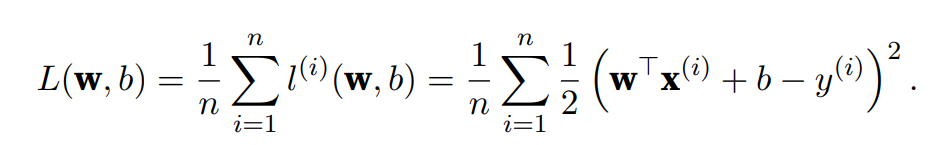

### Minibatch Stochastic Gradient Descent

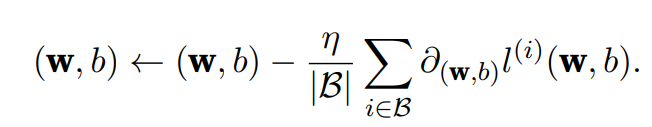

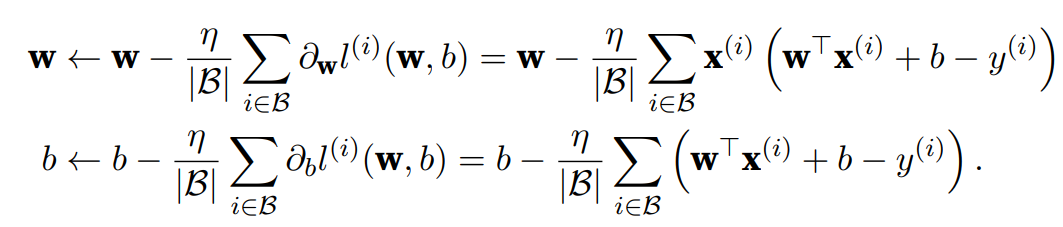

### 3.1.3 The Normal Distribution and Squared Loss

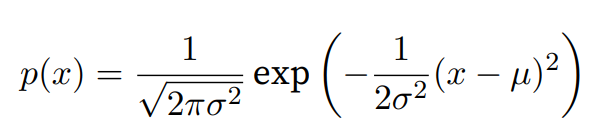

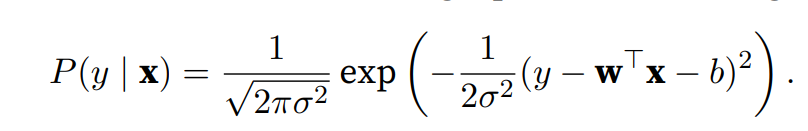

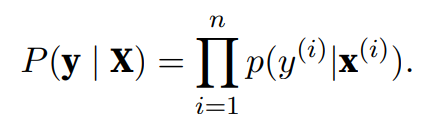

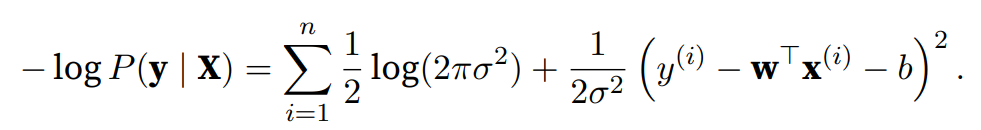

## 3.2 Linear Regression Implementation from Scratch

In [7]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### 3.2.1 Generating the Dataset

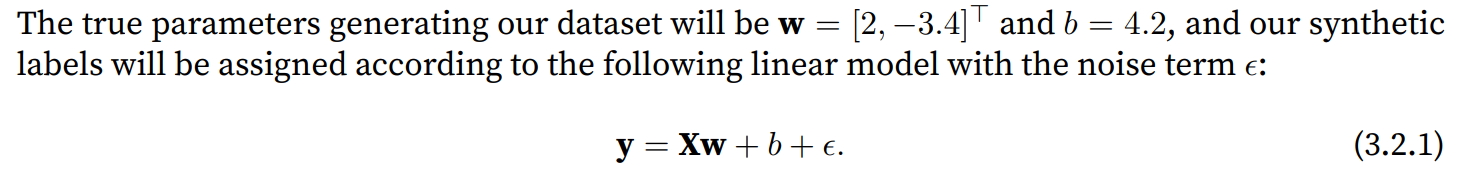

In [10]:
def synthetic_data(w, b, num_examples): 
  """Generate y = Xw + b + noise."""
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  
  return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0], 'label:', labels[0])

features: tensor([0.9285, 0.3799]) label: tensor([4.7654])


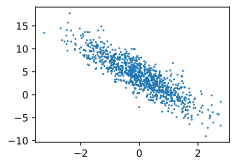

In [13]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);


### 3.2.2 Reading the Dataset

In [16]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  # The examples are read at random, in no particular order
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
  print(X, '\n', y)
  print(X.shape, y.shape)
  break


tensor([[ 0.2597, -0.9266],
        [-2.0617,  0.5327],
        [-1.0842,  1.5877],
        [ 0.6119, -0.1781],
        [-0.6866, -1.5833],
        [-1.4905,  0.0089],
        [ 1.6595, -0.4249],
        [ 0.7605, -1.9571],
        [-0.3672,  0.7475],
        [ 0.3613, -0.3596]]) 
 tensor([[ 7.8772],
        [-1.7171],
        [-3.3641],
        [ 6.0188],
        [ 8.2062],
        [ 1.1718],
        [ 8.9757],
        [12.3893],
        [ 0.9161],
        [ 6.1462]])
torch.Size([10, 2]) torch.Size([10, 1])


### 3.2.3 Initializing Model Parameters

In [22]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

def linreg(X, w, b):
  """Linear regression model"""
  return torch.mm(X, w) + b

def squared_loss(y_hat, y):
  """Squared loss."""
  return (y_hat - y.reshape(y_hat.shape))**2 / 2

def sgd(params, lr, batch_size):
  """Minibatch stochastic gradient descent."""
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()




In [28]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    sgd([w, b], lr, batch_size)
    with torch.no_grad():
      train_l = loss(net(features, w, b), labels)
      print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, loss 0.000051
epoch 1, lo

In [ ]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

## 3.3 Concise Implementation of Linear Regression

In [5]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

def load_array(data_arrays, batch_size, is_train=True): 
  """Construct a PyTorch data iterator."""
  dataset = data.TensorDataset(*data_arrays)
  return data.DataLoader(dataset, batch_size, shuffle=is_train)


batch_size = 10
data_iter = load_array((features, labels), batch_size)



In [8]:
next(iter(data_iter))

[tensor([[ 1.1645,  1.2870],
         [ 0.3559,  1.2531],
         [-1.1781, -0.3073],
         [-1.1100,  0.3726],
         [-0.5638,  1.2306],
         [-0.3827,  0.1414],
         [-0.4776, -0.2533],
         [-1.5454, -0.9037],
         [-1.7768,  0.8741],
         [ 2.3078, -1.9043]]), tensor([[ 2.1578],
         [ 0.6449],
         [ 2.8978],
         [ 0.6992],
         [-1.1176],
         [ 2.9832],
         [ 4.1230],
         [ 4.1796],
         [-2.3285],
         [15.2839]])]

In [10]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

### 3.3.4 Initializing Model Parameters

In [11]:
net

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [12]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

### 3.3.5 Defining the Loss Function

In [17]:
[item for item in net.parameters()]

[Parameter containing:
 tensor([[ 1.9997, -3.4001]], requires_grad=True), Parameter containing:
 tensor([4.1995], requires_grad=True)]

In [28]:
# loss = nn.MSELoss(reduction='sum')
loss = nn.HuberLoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

num_epochs = 3
for epoch in range(num_epochs):
  for X, y in data_iter:
    l = loss(net(X), y)
    # print()
    trainer.zero_grad()
    l.backward()
    trainer.step()
    # print(net[0].weight.grad)
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l/y.shape[0]:f}')

epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000006
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, loss 0.000005
epoch 1, lo

In [29]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0004, -0.0007])
error in estimating b: tensor([0.0003])


## 3.4 Softmax Regression

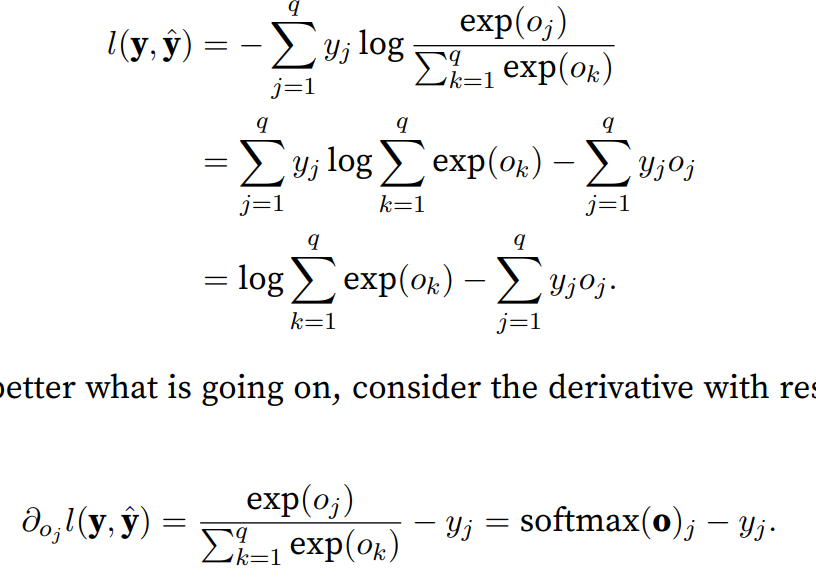

## 3.5 The Image Classification Dataset

In [33]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
d2l.use_svg_display()


trans = transforms.ToTensor()

mnist_train = torchvision.datasets.FashionMNIST(
    root="./data", 
    train=True, 
    transform=trans,
    download=True
)

mnist_test = torchvision.datasets.FashionMNIST(
    root="./data", 
    train=False,
    transform=trans, 
    download=True
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [34]:
len(mnist_train), len(mnist_test)


(60000, 10000)

In [39]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a5b5a4b90>,
      dtype=object)

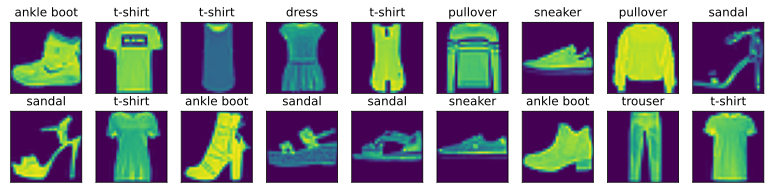

In [43]:
def get_fashion_mnist_labels(labels): 
  """Return text labels for the Fashion-MNIST dataset."""
  text_labels = [
  't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
  'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels]


def show_images(imgs, 
                num_rows, 
                num_cols, 
                titles=None, 
                scale=1.5
  ):
  """Plot a list of images."""
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
    # Tensor Image
      ax.imshow(img.numpy())
    else:
    # PIL Image
      ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
  return axes

X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y))

In [44]:
batch_size = 256
def get_dataloader_workers(): 
  """Use 4 processes to read the data."""
  return 4
train_iter = data.DataLoader(
    mnist_train, 
    batch_size, 
    shuffle=True,
    num_workers=get_dataloader_workers()
)

timer = d2l.Timer()
for X, y in train_iter:
  continue
f'{timer.stop():.2f} sec'

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


'5.12 sec'

In [47]:
def load_data_fashion_mnist(batch_size, resize=None): 
  """Download the Fashion-MNIST dataset and then load it into memory."""
  trans = [transforms.ToTensor()]
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  mnist_train = torchvision.datasets.FashionMNIST(
      root="./data",
      train=True,
      transform=trans,
      download=True
  )

  mnist_test = torchvision.datasets.FashionMNIST(
      root="./data",
      train=False,
      transform=trans,
      download=True
  )
  return (data.DataLoader(
              mnist_train, 
              batch_size, 
              shuffle=True,
              num_workers=get_dataloader_workers()),
          data.DataLoader(
              mnist_test, 
              batch_size, 
              shuffle=False,
              num_workers=get_dataloader_workers())
          )


train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## 3.6 Implementation of Softmax Regression from Scratch

In [ ]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


num_inputs = 28*28
num_outputs = 10
W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)


In [49]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True), X.sum(1, keepdim=True)

(tensor([[5., 7., 9.]]), tensor([[ 6.],
         [15.]]))

In [51]:
X

tensor([[1., 2., 3.],
        [4., 5., 6.]])

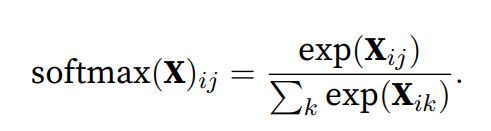

In [52]:
def softmax(X):
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdim=True)
  return X_exp / partition

X = torch.normal(0, 1, (2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(1)

(tensor([[0.0119, 0.3958, 0.4593, 0.1217, 0.0112],
         [0.1898, 0.2495, 0.3901, 0.1045, 0.0661]]), tensor([1., 1.]))

In [54]:
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b)

y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]


tensor([0.1000, 0.5000])